# 0.5 Making dataset

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
proc_data_dir = '../data/processed/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [6]:
images, labels_str = get_images(train_image_dir)

In [7]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [8]:
images = np.reshape(images,(-1,300,300,3))
labels = np.array(labels_int)

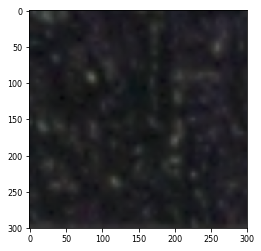

In [9]:
plt.imshow(images[754]) ##!!!!! damn

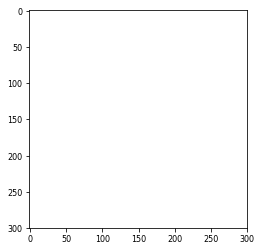

In [10]:
mask = vs.create_mask_for_plant(images[754])
seg_image = cv2.bitwise_and(images[754], images[754], mask=mask)
seg_image = vs.sharpen_image(seg_image)
seg_image[mask == 0] = 255

img = cv2.cvtColor(seg_image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [11]:
dataset = create_dataset(images, labels)

In [12]:
dataset.head()

,label,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,9,4245.0,353.764499,75,88,0.852273,1.554770,29.481583,9.725844,11.541733,6.088189,20.808731,24.505210,13.222195,443.390356,0.962804,2.258445
0,9,8891.5,421.546242,125,121,1.033058,1.701063,19.985518,13.390867,15.767678,7.641989,24.935571,29.251927,14.481795,346.967323,0.973616,2.553794
0,9,4886.0,333.362478,84,91,0.923077,1.564470,22.744687,10.130722,11.900622,6.273078,22.773547,26.494813,14.221009,285.960447,0.972714,2.075371
0,9,9039.5,386.090401,98,133,0.736842,1.441894,16.490492,12.389667,14.562111,6.971100,24.131291,28.169791,13.716031,232.337831,0.981612,2.280736
0,9,283.5,73.012192,20,27,0.740741,1.904762,18.803458,15.295611,17.843856,9.533411,25.185857,29.143992,16.023515,402.579138,0.974327,3.102906


In [13]:
dataset.to_csv("data/advanced_features_resized_denoised.csv")